# Text Classification: Natural Language Processing with Disaster Tweets

## Downloading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
## read csv data using pandas
train_df = pd.read_csv('train.csv',            # make sure to put the file in the working directory
                 sep=',',                      # separater
                 header = 0,                   # the header that indicates the column names is at row 0
                 usecols=['id','keyword', 'location', 'text', 'target'])

# print out the dataframe
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


## Exploratory Data Analysis (Training Set)

### Examine the length of the text in the training set


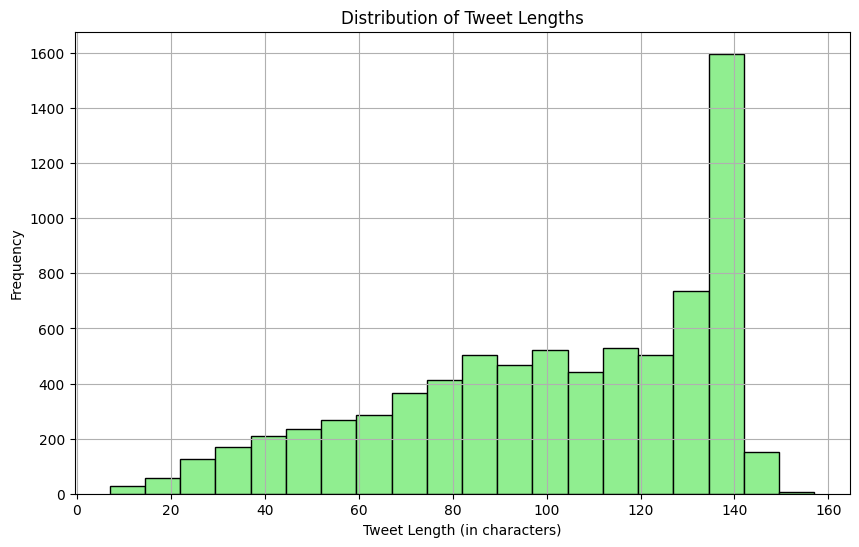

In [ ]:
# Extract the tweet lengths
train_tweet_lengths = train_df['text'].apply(len)

# Plotting the distribution of tweet lengths
plt.figure(figsize=(10, 6))
plt.hist(train_tweet_lengths, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (in characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

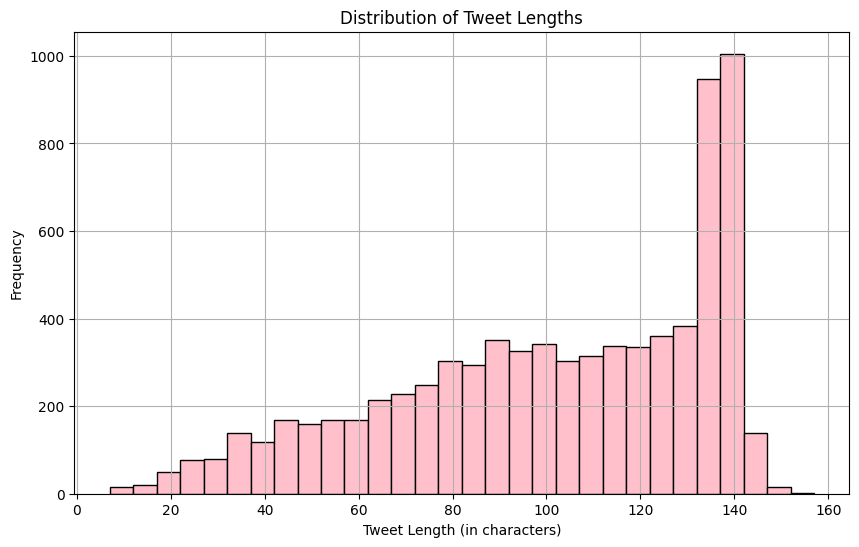

In [ ]:
# Plotting the distribution of tweet lengths
plt.figure(figsize=(10, 6))
plt.hist(train_tweet_lengths, bins=30, color='pink', edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (in characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Get the counts of disaster vs. non-disaster tweets
train_tweet_counts = train_df['target'].value_counts()

# Print the counts
print("Disaster Tweets:", train_tweet_counts[1])
print("Non-Disaster Tweets:", train_tweet_counts[0])

Disaster Tweets: 3271
Non-Disaster Tweets: 4342


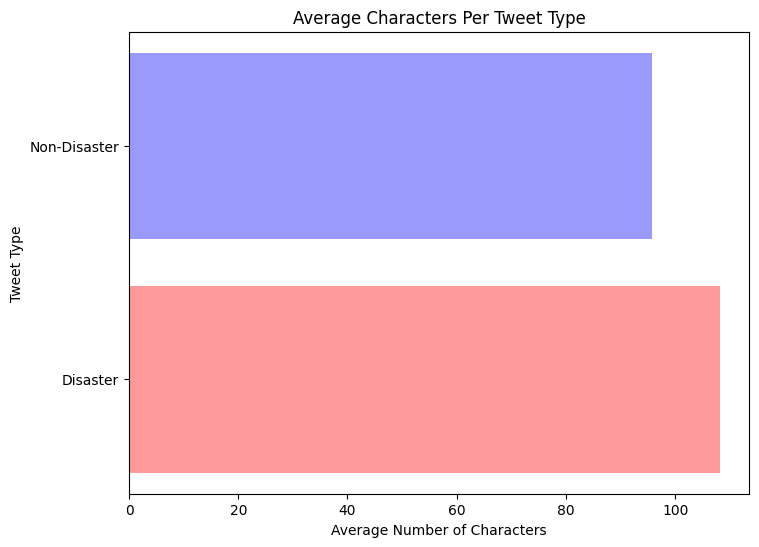

In [ ]:
# Calculate average tweet length for disaster vs. non-disaster
average_length_disaster = train_df[train_df['target'] == 1]['text'].apply(len).mean()
average_length_non_disaster = train_df[train_df['target'] == 0]['text'].apply(len).mean()

# Visualize average characters per disaster vs. non-disaster
plt.figure(figsize=(8, 6))
plt.barh(['Disaster', 'Non-Disaster'], [average_length_disaster, average_length_non_disaster], color=['#FE9999', '#9A99FC'])
plt.title('Average Characters Per Tweet Type')
plt.xlabel('Average Number of Characters')
plt.ylabel('Tweet Type')
plt.show()


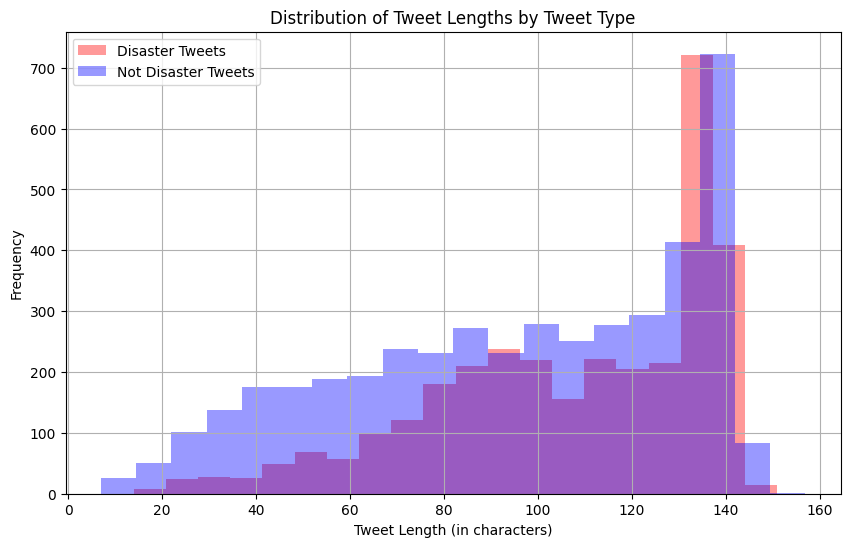

In [ ]:
# Filter the dataframe for real disaster tweets (target=1)
disaster_twt = train_df[train_df['target'] == 1]
disaster_lengths = disaster_twt['text'].apply(len)

# Filter the dataframe for metaphorical tweets (target=0)
not_disaster_twt = train_df[train_df['target'] == 0]
not_disaster_lengths = not_disaster_twt['text'].apply(len)

# Plot distrib. of tweet lengths for real disaster tweets
plt.figure(figsize=(10, 6))
plt.hist(disaster_lengths, bins=20, color='red', alpha=0.4, label='Disaster Tweets')
plt.hist(not_disaster_lengths, bins=20, color='blue', alpha=0.4, label='Not Disaster Tweets')
plt.title('Distribution of Tweet Lengths by Tweet Type')
plt.xlabel('Tweet Length (in characters)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

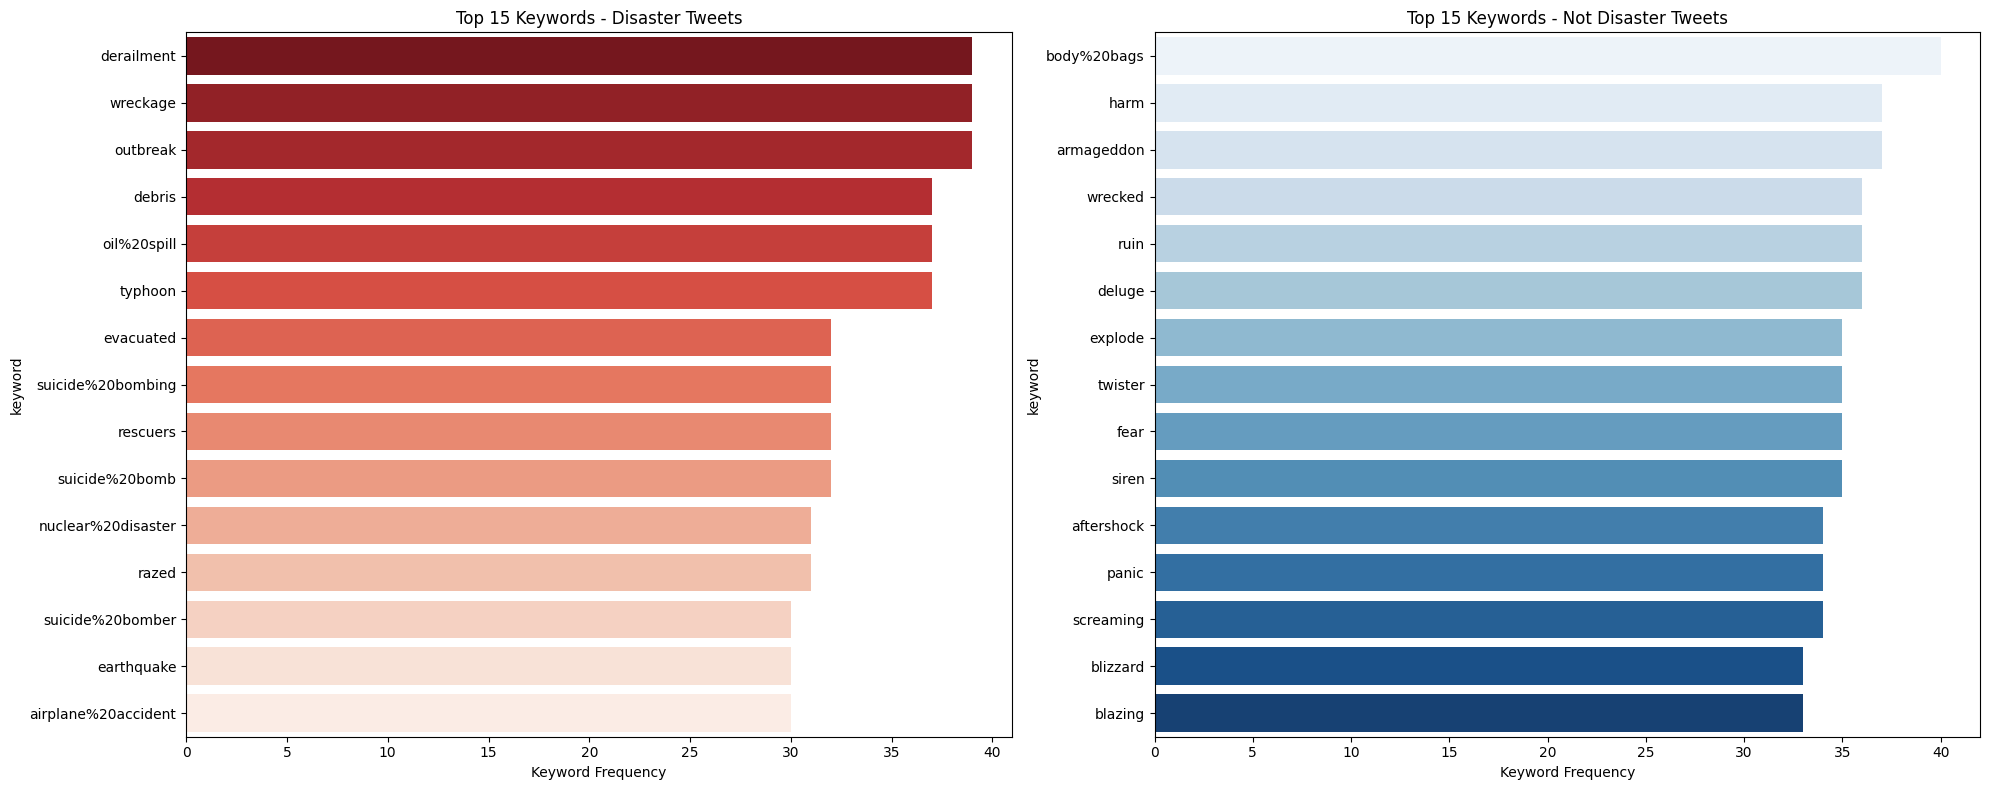

In [ ]:
disaster_keywords = disaster_twt["keyword"].value_counts()
not_disaster_keywords = not_disaster_twt["keyword"].value_counts()

palette = sns.color_palette("Reds", len(disaster_keywords[0:15]))
reversed_palette = sns.color_palette(palette[::-1], as_cmap=True)

palette_not = sns.color_palette("Blues", len(not_disaster_keywords[0:15]))

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(
    y=disaster_keywords[0:15].index,
    x=disaster_keywords[0:15],
    orient='h',
    ax=ax[0],
    hue=disaster_keywords[0:15].index,
    palette=reversed_palette)
ax[0].set_title("Top 15 Keywords - Disaster Tweets")
ax[0].set_xlabel("Keyword Frequency")

sns.barplot(
    y=not_disaster_keywords[0:15].index,
    x=not_disaster_keywords[0:15],
    orient='h',
    ax=ax[1],
    hue=not_disaster_keywords[0:15].index,
    palette=palette_not)
ax[1].set_title("Top 15 Keywords - Not Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")

plt.tight_layout()
plt.show()